# Nama : RIZKY MAULANA ALI

In [1]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.6 MB/s eta 0:00:00


In [2]:
!pip install langchain_experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 3.9 MB/s eta 0:00:00


In [3]:
import os
from google.colab import userdata
import pandas as pd
from langchain_community.llms import Replicate
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
api_token = userdata.get("api_token")
os.environ["REPLICATE_API_TOKEN"] = api_token
print("API token untuk Replicate berhasil dikonfigurasi.")

API token untuk Replicate berhasil dikonfigurasi.


In [5]:
parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 2048,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0.7,
}
llm = Replicate(
    model="openai/gpt-4.1-mini",
    input=parameters,
)
print("Model Replicate LLM berhasil diinisialisasi.")

Model Replicate LLM berhasil diinisialisasi.


In [6]:
df = pd.read_csv("BTC-USD_historical_data.csv")
print(f"Dataset 'BTC-USD_historical_data.csv' berhasil dimuat. Data memiliki {len(df)} baris.")
print("Berikut 5 baris pertama dari dataset:")
print(df.head())

Dataset 'BTC-USD_historical_data.csv' berhasil dimuat. Data memiliki 366 baris.
Berikut 5 baris pertama dari dataset:
         Date         Close          High           Low          Open  \
0  2024-01-01  44167.332031  44175.437500  42214.976562  42280.234375   
1  2024-01-02  44957.968750  45899.707031  44176.949219  44187.140625   
2  2024-01-03  42848.175781  45503.242188  40813.535156  44961.601562   
3  2024-01-04  44179.921875  44770.023438  42675.175781  42855.816406   
4  2024-01-05  44162.691406  44353.285156  42784.718750  44192.980469   

        Volume  
0  18426978443  
1  39335274536  
2  46342323118  
3  30448091210  
4  32336029347  


Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Gambarkan tren harga penutupan dari waktu ke waktu."


> Entering new AgentExecutor chain...
Thought: To visualize the closing price trend over time, I need to plot the 'Close' column against the 'Date' column in the dataframe `df`. I'll use a plotting library like Matplotlib or Seaborn to create a line chart.

Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], marker='o')
plt.title('Trend of Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid()
plt.show()
```
NameError: name 'pd' is not definedI forgot to import the pandas library, which is necessary to handle the dataframe. I need to import pandas and then reattempt the plotting.

Action: python_repl_ast
Actio

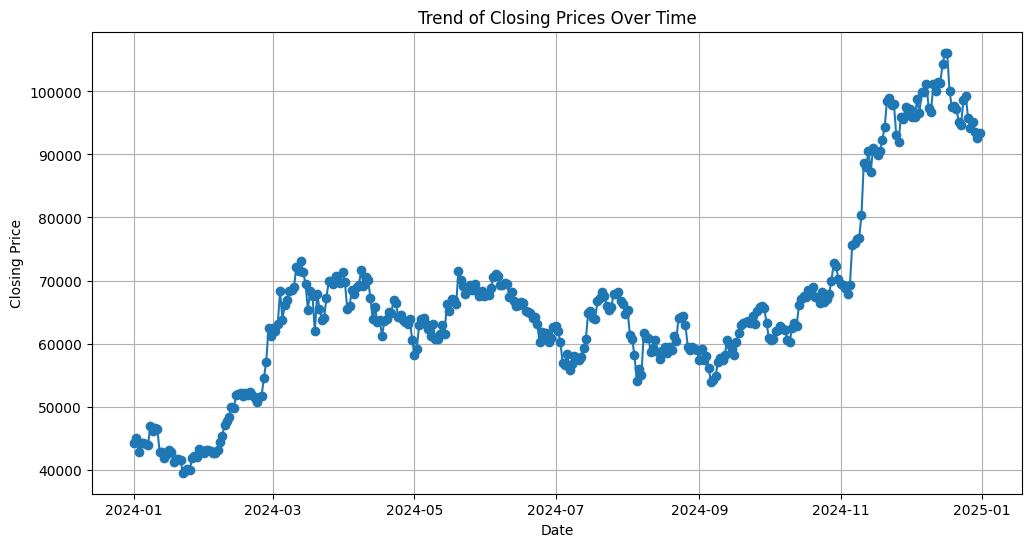

The plotting code executed successfully and displayed the trend of closing prices over time. I can now describe the resulting plot.

Final Answer: The plot illustrates the trend of closing prices over time, showing fluctuations in the closing price values across the specified dates.

> Finished chain.

--- Respon dari Agent ---
The plot illustrates the trend of closing prices over time, showing fluctuations in the closing price values across the specified dates.


In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Gambarkan tren harga penutupan dari waktu ke waktu."
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Bulan apa yang memiliki harga penutupan rata-rata tertinggi"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Bulan apa yang memiliki harga penutupan rata-rata tertinggi"


> Entering new AgentExecutor chain...
Thought: I need to calculate the average closing price for each month and then determine which month has the highest average closing price. To do this, I will convert the 'Date' column to datetime format, extract the month and year, group the data by month and year, and then calculate the average closing price for each group.

Action: python_repl_ast
Action Input: 
```python
import pandas as pd

# Assuming df is already defined as described
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')
average_close = df.groupby('YearMonth')['Close'].mean().reset_index()
highest_avg_close = average_close.loc[average_close['Close'].idxmax()]
highest_avg_close
```
YearMonth         2024-12
Close        98232.948589
Name: 11, dtype: objectI now know the final answer
Final Ans

In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Bulan apa yang memiliki harga penutupan rata-rata paling rendah dan tertinggi"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Bulan apa yang memiliki harga penutupan rata-rata paling rendah dan tertinggi"


> Entering new AgentExecutor chain...
Question: Bulan apa yang memiliki harga penutupan rata-rata paling rendah dan tertinggi
Thought: To find the month with the lowest and highest average closing price, I need to:
1. Convert the 'Date' column to datetime if it is not already.
2. Extract the month from the 'Date' column.
3. Group the dataframe by the month and calculate the average closing price for each month.
4. Identify the month with the lowest average closing price and the month with the highest average closing price.

Action: python_repl_ast
Action Input: |
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    avg_close_by_month = df.groupby('Month')['Close'].mean()
    avg_close_by_month
SyntaxError: invalid syntax (<unknown>, line 1)Thought: I forgot to import pandas as pd, wh

In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Bulan,tanggal,dan tahun apa yang memiliki volume paling tinggi tampilkan nominalnya"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Bulan,tanggal,dan tahun apa yang memiliki volume paling tinggi tampilkan nominalnya"


> Entering new AgentExecutor chain...
Question: Bulan,tanggal,dan tahun apa yang memiliki volume paling tinggi tampilkan nominalnya
Thought: I need to find the row in the dataframe `df` with the highest volume and then extract the date and volume from that row.
Action: python_repl_ast
Action Input: df.loc[df['Volume'].idxmax(), ['Date', 'Volume']]
Date      2024-12-05 00:00:00
Volume           149218945580
Name: 339, dtype: objectThought: The date with the highest volume is 2024-12-05 and the volume is 149218945580. I will format the answer to show the month, day, year, and volume.

Final Answer: Bulan, tanggal, dan tahun dengan volume paling tinggi adalah 5 Desember 2024 dengan volume sebesar 149218945580.

> Finished chain.

--- Respon dari Agent ---
Bulan, tanggal, dan tahun dengan volume paling tinggi adal

In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Bulan,tanggal,dan tahun apa yang memiliki volume paling rendah tampilkan nominalnya"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Bulan,tanggal,dan tahun apa yang memiliki volume paling rendah tampilkan nominalnya"


> Entering new AgentExecutor chain...
Question: Bulan,tanggal,dan tahun apa yang memiliki volume paling rendah tampilkan nominalnya
Thought: I need to find the row in the dataframe `df` that has the lowest volume and then extract the date and volume from that row.
Action: python_repl_ast
Action Input: df.loc[df['Volume'].idxmin(), ['Date', 'Volume']]
Date      2024-01-21 00:00:00
Volume             9344043642
Name: 20, dtype: objectThought: The date with the lowest volume is January 21, 2024, and the volume is 9,344,043,642.
Final Answer: The date with the lowest volume is 2024-01-21, and the volume is 9,344,043,642.

> Finished chain.

--- Respon dari Agent ---
The date with the lowest volume is 2024-01-21, and the volume is 9,344,043,642.


In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Hitung rata rata dari high selama setahun"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Hitung rata rata dari high selama setahun"


> Entering new AgentExecutor chain...
Thought: I need to calculate the average of the "High" column for the entire year. Since the dataframe has a "YearMonth" column, I can use it to filter or group by the year, but it looks like all the data might be from the same year 2024. I can simply calculate the mean of the "High" column for the whole dataframe.

Action: python_repl_ast
Action Input: df['High'].mean()
67193.34308828552Thought: I have calculated the average of the "High" column for the entire dataframe, which presumably represents one year. The average is approximately 67193.34.

Final Answer: Rata-rata dari nilai "High" selama setahun adalah sekitar 67193.34.

> Finished chain.

--- Respon dari Agent ---
Rata-rata dari nilai "High" selama setahun adalah sekitar 67193.34.


In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Hitung rata rata dari low selama setahun"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Hitung rata rata dari low selama setahun"


> Entering new AgentExecutor chain...
Question: Hitung rata rata dari low selama setahun
Thought: Untuk menghitung rata-rata dari kolom "Low" selama setahun, saya harus mengelompokkan data berdasarkan tahun. Tahun dapat diambil dari kolom "Date" atau dari kolom "YearMonth" yang sudah ada, yang hanya perlu dipotong menjadi tahun saja. Setelah itu hitung rata-rata kolom "Low" per tahun.
Action: python_repl_ast
Action Input: 
df['Year'] = df['YearMonth'].str[:4]
df.groupby('Year')['Low'].mean()
AttributeError: Can only use .str accessor with string values!Thought: Kolom 'YearMonth' mungkin bukan bertipe string, sehingga tidak bisa menggunakan .str. Saya akan coba cek tipe datanya dulu dan mengubahnya ke string jika perlu, lalu baru ambil tahun dan hitung rata-rata kolom 'Low' per tahun.

Action: python_repl_ast
Action Input: 
df['YearMonth'].dtype

period

In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Hitung rata rata dari volume selama setahun"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Hitung rata rata dari volume selama setahun"


> Entering new AgentExecutor chain...
Thought: To find the average volume over the entire year, I need to calculate the mean of the 'Volume' column grouped by the 'Year' column or directly calculate the mean if there is only one year.

Action: I will calculate the mean of the 'Volume' column.

Action Input: df['Volume'].mean()

I will calculate the mean of the 'Volume' column. is not a valid tool, try one of [python_repl_ast].Question: Hitung rata rata dari volume selama setahun
Thought: To find the average volume over the entire year, I need to calculate the mean of the 'Volume' column grouped by the 'Year' column or directly calculate the mean if there is only one year.

Action: I will calculate the mean of the 'Volume' column.

Action Input: 
```python
df['Volume'].mean()
```

I will calculate the mean of the 'Volume' column. is not a valid tool,

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Gambarkan plot pada column volume selama setahun"


> Entering new AgentExecutor chain...
Thought: To plot the 'Volume' column over the course of a year, I need to use the 'Date' column as the x-axis and 'Volume' as the y-axis. I will create a line plot for this.

Action: python_repl_ast
Action Input: 
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volume'], label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume over the year')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

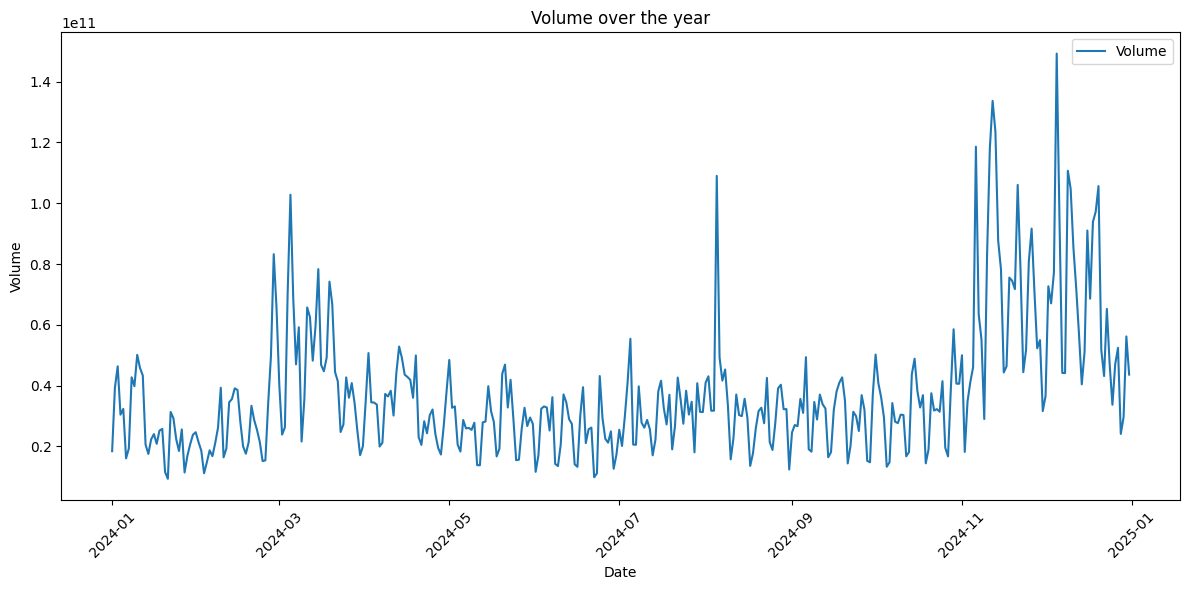

Thought: The plot has been generated successfully showing the 'Volume' column over the course of the year using the 'Date' column as the x-axis. This fulfills the requirement of the question.

Final Answer: Berikut adalah plot dari kolom 'Volume' selama setahun dengan sumbu x adalah 'Date' dan sumbu y adalah 'Volume'.

> Finished chain.

--- Respon dari Agent ---
Berikut adalah plot dari kolom 'Volume' selama setahun dengan sumbu x adalah 'Date' dan sumbu y adalah 'Volume'.


In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Gambarkan plot pada column volume selama setahun"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Gambarkan plot pada column low dan high buatkan perbandingannya dalam bentuk plot selama setahun"


> Entering new AgentExecutor chain...
Thought: To create a comparison plot of the 'Low' and 'High' columns over the course of a year, I need to plot these two columns against the 'Date' column. Since the data appears to be daily, the x-axis will be the 'Date' and the y-axis will show the values of 'Low' and 'High'. I will use matplotlib or pandas plotting functionality to do this.

Action: python_repl_ast
Action Input: 
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Low'], label='Low', color='blue')
plt.plot(df['Date'], df['High'], label='High', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Low and High values over one year')
plt.legend()
plt.grid(True)
plt.show()

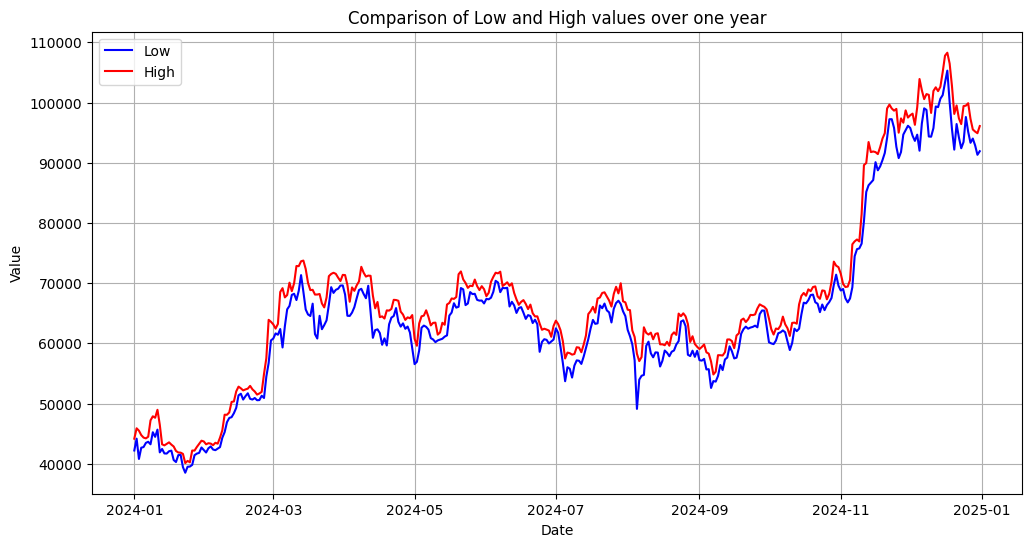

Thought: The plot of 'Low' and 'High' columns over the year has been generated successfully. This visualizes the comparison between the two columns throughout the year.

Final Answer: Berikut adalah plot perbandingan nilai 'Low' dan 'High' selama satu tahun, dengan sumbu x sebagai tanggal dan sumbu y sebagai nilai 'Low' dan 'High'. Plot ini memudahkan untuk melihat fluktuasi dan perbedaan nilai antara 'Low' dan 'High' setiap hari sepanjang tahun.

> Finished chain.

--- Respon dari Agent ---
Berikut adalah plot perbandingan nilai 'Low' dan 'High' selama satu tahun, dengan sumbu x sebagai tanggal dan sumbu y sebagai nilai 'Low' dan 'High'. Plot ini memudahkan untuk melihat fluktuasi dan perbedaan nilai antara 'Low' dan 'High' setiap hari sepanjang tahun.


In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Gambarkan plot pada column low dan high buatkan perbandingannya dalam bentuk plot selama setahun"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Berdasarkan data yang ada pada tanggal berapa yang bagus untuk membeli dan menjual koin kita"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Berdasarkan data yang ada pada tanggal berapa yang bagus untuk membeli dan menjual koin kita"


> Entering new AgentExecutor chain...
Question: Berdasarkan data yang ada pada tanggal berapa yang bagus untuk membeli dan menjual koin kita  
Thought: Untuk menentukan tanggal yang bagus untuk membeli dan menjual koin, biasanya kita ingin membeli pada harga terendah (Low) dan menjual pada harga tertinggi (High) dalam rentang waktu yang ada di dataset. Saya akan mencari tanggal dengan harga Low terendah sebagai tanggal membeli dan tanggal dengan harga High tertinggi sebagai tanggal menjual.  
Action: python_repl_ast  
Action Input: 
lowest_price_date = df.loc[df['Low'].idxmin(), 'Date']
highest_price_date = df.loc[df['High'].idxmax(), 'Date']
lowest_price_date, highest_price_date
(Timestamp('2024-01-23 00:00:00'), Timestamp('2024-12-17 00:00:00'))Thought: Saya sudah mendapatkan tanggal dengan harga te

In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Berdasarkan track record dari data yang ada untuk satu tahun kedepan apakah bitcoin ini mengalami kenaikan atau penurunan harga dan sebutkan berapa persen kenaikan atau penurunan tersebut"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Berdasarkan track record dari data yang ada untuk satu tahun kedepan apakah bitcoin ini mengalami kenaikan atau penurunan harga dan sebutkan berapa persen kenaikan atau penurunan tersebut"


> Entering new AgentExecutor chain...
Question: Berdasarkan track record dari data yang ada untuk satu tahun kedepan apakah bitcoin ini mengalami kenaikan atau penurunan harga dan sebutkan berapa persen kenaikan atau penurunan tersebut
Thought: To determine if Bitcoin's price increased or decreased over one year, I need to compare the closing price at the start and end of the year. I will find the first and last closing prices in the dataframe and calculate the percentage change.
Action: python_repl_ast
Action Input: 
first_close = df.iloc[0]['Close']
last_close = df.iloc[-1]['Close']
percentage_change = ((last_close - first_close) / first_close) * 100
first_close, last_close, percentage_change
(np.float64(4

In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Berapa persen kenaikan bitcoin selama tahun berdasarkan data yang ada"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Berapa persen kenaikan bitcoin selama tahun berdasarkan data yang ada"


> Entering new AgentExecutor chain...
Question: Berapa persen kenaikan bitcoin selama tahun berdasarkan data yang ada
Thought: Untuk menghitung persentase kenaikan bitcoin selama tahun 2024, saya perlu mendapatkan harga pembukaan (Open) pertama di awal tahun dan harga penutupan (Close) terakhir di akhir tahun, lalu menghitung persentase kenaikannya.
Action: [python_repl_ast]
Action Input: |
    start_open = df.iloc[0]['Open']
    end_close = df.iloc[-1]['Close']
    percent_increase = ((end_close - start_open) / start_open) * 100
    percent_increase
[python_repl_ast] is not a valid tool, try one of [python_repl_ast].Thought: Saya salah mengetik format tool. Saya akan mencoba lagi menggunakan tool yang benar yaitu python_repl_ast untuk menjalankan kode dan mendapatkan hasil persentase kenaikan harga bitcoin selama tahun ber

In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Berdasaarkan data yang ada pola apa yang anda dapat untuk memprediksik enaikan harga dan penurunan harga"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Berdasaarkan data yang ada pola apa yang anda dapat untuk memprediksi kenaikan harga dan penurunan harga"


> Entering new AgentExecutor chain...
Thought: Untuk memprediksi kenaikan dan penurunan harga berdasarkan data yang ada, kita dapat mencari pola dengan menganalisis kolom harga seperti Open, Close, High, dan Low. Pola sederhana yang umum digunakan adalah membandingkan harga Close dengan harga Open untuk melihat apakah harga naik atau turun dalam satu hari. Selain itu, melihat volume transaksi juga dapat membantu mengidentifikasi kekuatan pergerakan harga. Saya akan membuat kolom baru untuk menandai apakah harga naik atau turun berdasarkan perbandingan Close dan Open, kemudian melihat pola dasar dari data tersebut.

Action: python_repl_ast
Action Input: |
    import pandas as pd

    df['Price_Change'] = df['Close'] - df['Open']
    df['Price_Trend'] = df['Price_Change'].apply(lambda x: 'Up

In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Dari tanggal berapa terjadi open dah close harga yang tertinggi"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Dari tanggal berapa terjadi open dah close harga yang tertinggi"


> Entering new AgentExecutor chain...


/tmp/ipython-input-7-3716193960.py:8: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response_from_agent = agent.run(user_prompt)


Question: Dari tanggal berapa terjadi open dan close harga yang tertinggi  
Thought: Saya perlu mencari tanggal dengan harga Open tertinggi dan tanggal dengan harga Close tertinggi.  
Action: python_repl_ast  
Action Input: 
# Cari tanggal dengan harga Open tertinggi
max_open_date = df.loc[df['Open'].idxmax(), 'Date']
max_open_value = df['Open'].max()

# Cari tanggal dengan harga Close tertinggi
max_close_date = df.loc[df['Close'].idxmax(), 'Date']
max_close_value = df['Close'].max()

(max_open_date, max_open_value, max_close_date, max_close_value)  
('2024-12-18', 106147.296875, '2024-12-17', 106140.6015625)Thought: Saya sudah menemukan tanggal dan harga tertinggi untuk Open dan Close. Tanggal dengan harga Open tertinggi adalah 2024-12-18 dengan harga 106147.30, dan tanggal dengan harga Close tertinggi adalah 2024-12-17 dengan harga 106140.60.  
Final Answer: Harga Open tertinggi terjadi pada tanggal 2024-12-18 dengan harga 106147.30, dan harga Close tertinggi terjadi pada tanggal 202

In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Dari tanggal berapa terjadi open dah close harga yang terendah berikan nominalnya"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Dari tanggal berapa terjadi open dah close harga yang terendah berikan nominalnya"


> Entering new AgentExecutor chain...
Question: Dari tanggal berapa terjadi open dan close harga yang terendah berikan nominalnya
Thought: Saya perlu mencari tanggal dengan harga Open terendah dan tanggal dengan harga Close terendah, serta nominal harganya.
Action: [python_repl_ast]
Action Input: open_lowest = df.loc[df['Open'].idxmin()][['Date', 'Open']]
close_lowest = df.loc[df['Close'].idxmin()][['Date', 'Close']]
open_lowest, close_lowest
[python_repl_ast] is not a valid tool, try one of [python_repl_ast].Question: Dari tanggal berapa terjadi open dan close harga yang terendah berikan nominalnya
Thought: Saya perlu mencari tanggal dengan harga Open terendah dan tanggal dengan harga Close terendah, serta nominal harganya.
Action: python_repl_ast
Action Input: open_lowest = df.loc[df['Open'].idxmin()][['Date',

In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Rata rata berapa coin yang orang beli setiap bulannya"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Rata rata berapa coin yang setiap per satu orang beli setiap bulannya"


> Entering new AgentExecutor chain...
Question: Rata rata berapa coin yang setiap per satu orang beli setiap bulannya

Thought: 
The question seems to ask for the average amount of coins bought per person each month. To calculate this, I need to understand if the dataframe contains information about the number of people or transactions. However, the dataframe has columns: Date, Close, High, Low, Open, Volume, and Month. The 'Volume' likely represents the total volume of coins traded in a day or over the period. Without the number of people or transactions, I cannot find the average per person directly.

If there is an assumption about the number of people or if there's a known number of people, then I could divide the monthly volume by the number of people.

Since the dataframe does not include the number of people, I will 

In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Dari tanggal,bulan,tahun berapa bitcoin mengalami kenaikan yang sangat tinggi sebutkan nominal range sebelum kenaikan dan sesudah kenaikan"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Dari tanggal,bulan,tahun berapa bitcoin mengalami kenaikan yang sangat tinggi sebutkan nominal range sebelum kenaikan dan sesudah kenaikan"


> Entering new AgentExecutor chain...
Question: Dari tanggal, bulan, tahun berapa bitcoin mengalami kenaikan yang sangat tinggi sebutkan nominal range sebelum kenaikan dan sesudah kenaikan

Thought: Untuk mencari tanggal dengan kenaikan yang sangat tinggi, saya akan melihat kolom `Daily_Change` dan mencari nilai kenaikan tertinggi. Kemudian saya akan ambil tanggal tersebut dan nilai harga penutupan (Close) sebelum dan sesudah kenaikan.

Action: python_repl_ast
Action Input: df[['Date', 'Close', 'Daily_Change']].sort_values(by='Daily_Change', ascending=False).head(5)
          Date         Close  Daily_Change
315 2024-11-11  88701.484375   8227.296875
220 2024-08-08  61710.136719   6682.675781
310 2024-11-06  75639.078125   6279.515625
79  2024-03-20  67913

In [7]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Berapa kenaikan harga koin tertinggi selama setahun"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Berapa high tertinggi selama setahun"


> Entering new AgentExecutor chain...


/tmp/ipython-input-2765353471.py:8: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response_from_agent = agent.run(user_prompt)


Thought: To find the highest value in the "High" column for the entire year, I need to find the maximum value in the "High" column of the dataframe `df`.

Action: python_repl_ast
Action Input: df['High'].max()
108268.4453125Thought: I now know the highest "High" value in the dataframe for the year.

Final Answer: High tertinggi selama setahun adalah 108268.45.

> Finished chain.

--- Respon dari Agent ---
High tertinggi selama setahun adalah 108268.45.


In [8]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Berapa penurunan harga koin terendah selama setahun"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Berapa high terendah selama setahun"


> Entering new AgentExecutor chain...
Question: Berapa high terendah selama setahun
Thought: Saya perlu mencari nilai minimum dari kolom 'High' pada dataframe df untuk mengetahui high terendah selama setahun.
Action: python_repl_ast
Action Input: df['High'].min()
40127.3515625Thought: Saya telah mendapatkan nilai minimum dari kolom 'High' yaitu 40127.3515625, yang merupakan nilai high terendah selama setahun.
Final Answer: High terendah selama setahun adalah 40127.35

> Finished chain.

--- Respon dari Agent ---
High terendah selama setahun adalah 40127.35


In [10]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)
print("Pandas DataFrame Agent berhasil dibuat.")
user_prompt = "Dari tanggal,bulan,tahun berapa bitcoin mengalami penurunan yang sangat rendah sebutkan nominal range sebelum kenaikan dan sesudah kenaikan"
print(f"\n--- Mengirim Prompt ke Agent ---")
print(f"Prompt Pengguna: \"{user_prompt}\"")

try:
    response_from_agent = agent.run(user_prompt)

    print(f"\n--- Respon dari Agent ---")
    print(response_from_agent)

except Exception as e:
    print(f"\nTerjadi kesalahan saat menjalankan agent: {e}")
    print("Pastikan model Replicate Anda berfungsi dengan baik dan parameter input sudah benar.")

Pandas DataFrame Agent berhasil dibuat.

--- Mengirim Prompt ke Agent ---
Prompt Pengguna: "Dari tanggal,bulan,tahun berapa bitcoin mengalami penurunan yang sangat rendah sebutkan nominal range sebelum kenaikan dan sesudah kenaikan"


> Entering new AgentExecutor chain...
Question: Dari tanggal,bulan,tahun berapa bitcoin mengalami penurunan yang sangat rendah sebutkan nominal range sebelum kenaikan dan sesudah kenaikan

Thought: Saya harus mencari tanggal dimana nilai "Change" menunjukkan penurunan yang sangat rendah (nilai negatif yang besar secara absolut). Kemudian, saya akan mencari nilai sebelum dan sesudah penurunan tersebut untuk mengetahui nominal range.

Action: python_repl_ast
Action Input: 
# Melihat nilai Change yang negatif dan mencari penurunan terbesar
df[df['Change'] < 0].sort_values('Change').head(1) 
          Date          Close           High            Low           Open  \
352 2024-12-18  100041.539062  106470.609375  100041.539062  106147.296875   

          Vol